In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- [Linear Regreassion](http://localhost:8888/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#Linear-Regression)
    - [multiple features](http://localhost:8888/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#Multiple-features)
- [Polynomial Regression](http://localhost:8888/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#Polynomial-Regression)
- [Ridge / Lasso Regression](http://localhost:8888/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#Lasso-/-Ridge-Regression)
- Elastic Net ?
- [Desicion Tree](http://localhost:8888/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#Desicion-Tree)
- [SVM](http://localhost:8889/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#SVM)
- [K-Nearest Neighbors](http://localhost:8888/notebooks/projects/machine_learning/Regressions_from_scratch.ipynb#KNN)

In [599]:
data = pd.read_csv('DATA/Advertising.csv')

In [600]:
data.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [601]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [602]:
data.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [603]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [604]:
X = data.drop("sales", axis=1) #data['TV'] + data['radio'] + data['newspaper']

In [605]:
y = data["sales"]

In [606]:
# 70% train
# 15% test
# 15% verify
train_p = int(len(X)*0.7)
test_p = int(len(X)*0.85)
X_train = X[0:train_p]
y_train = y[0:train_p]

X_test = X[train_p:test_p]
y_test = y[train_p:test_p]

X_verify = X[test_p:]
y_verify = y[test_p:]

In [607]:
len(X_train) + len(X_test) + len(X_verify) == len(X)

True

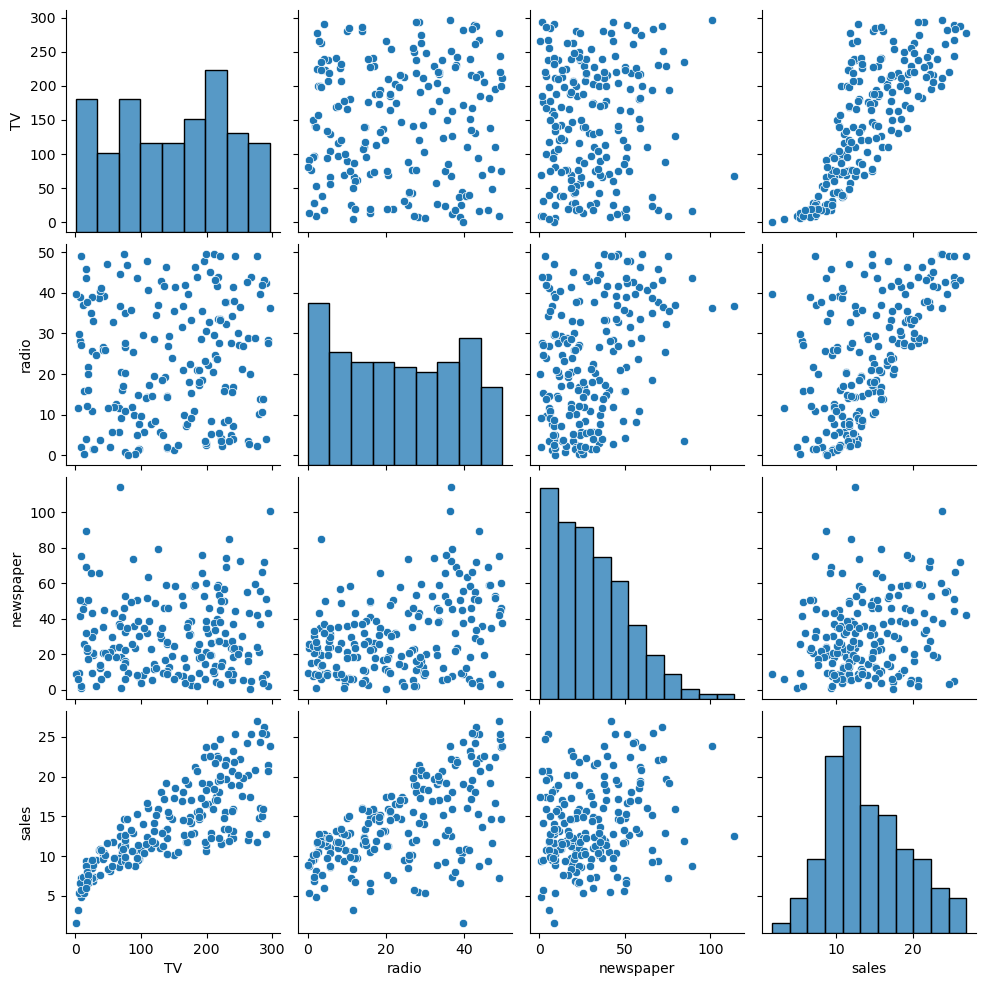

In [608]:
sns.pairplot(data)

# Linear Regression

In [609]:
#equation y = wx+b we need to calculate w and b
n = len(X_train)
#formula to calculate w : x-mean_x*y-mean_y/ (x-mean_x)^2
def get_coefficients(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    num = 0
    denom = 0
    for i in range (n):
        num = num + (x[i]-mean_x) * (y[i] - mean_y)
        denom = denom + (x[i]-mean_x) ** 2
    w = num/denom

    #calculate b = y_mean - w * mean_x / n
    b = (mean_y - w * mean_x)/n
    
    return w, b

In [610]:
feat_train = X_train["TV"] + X_train["radio"] + X_train["newspaper"]
w,b = get_coefficients(feat_train, y_train)

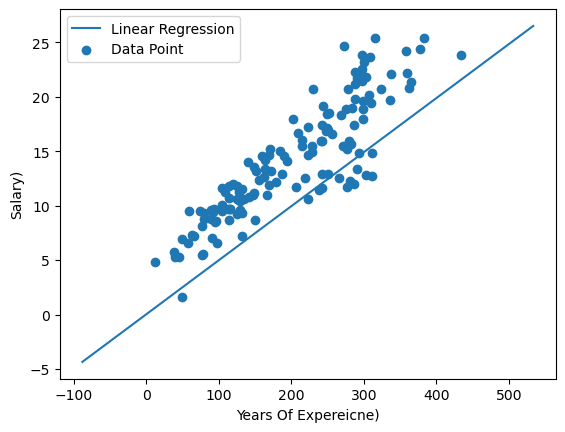

In [611]:
#plot it graphically 
x_max = np.max(feat_train)+100
x_min = np.min(feat_train)-100

#line values for x and y
x = np.linspace(x_min, x_max, 1000)
y = b + w * x

#plotting line 
plt.plot(x, y, label='Linear Regression')

#plot the data point
plt.scatter(feat_train, y_train, label='Data Point')

# x-axis label
plt.xlabel('Years Of Expereicne)')
#y-axis label
plt.ylabel('Salary)')
plt.legend()
plt.show()

### Multiple features

In [612]:
w1 = get_coefficients(X_train["TV"], y_train)[0]
w2 = get_coefficients(X_train["radio"], y_train)[0]
w3 = get_coefficients(X_train["newspaper"], y_train)[0]
b = (np.mean(y) - w1 * np.mean(X_train["TV"]) - w2 * np.mean(X_train["radio"]) - w3 * np.mean(X_train["newspaper"])) / n
w1, w2, w3,b

(0.04888180899352708,
 0.19476089939873376,
 0.04165802530822668,
 -0.015034563587117059)

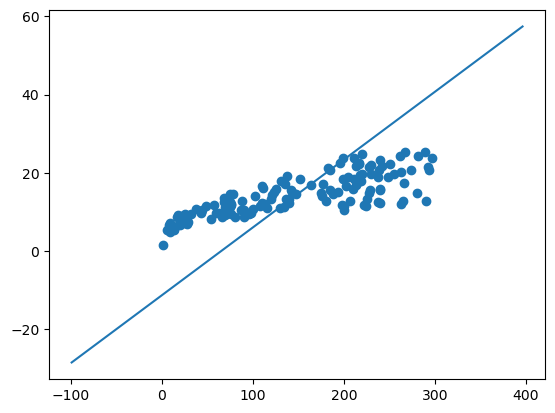

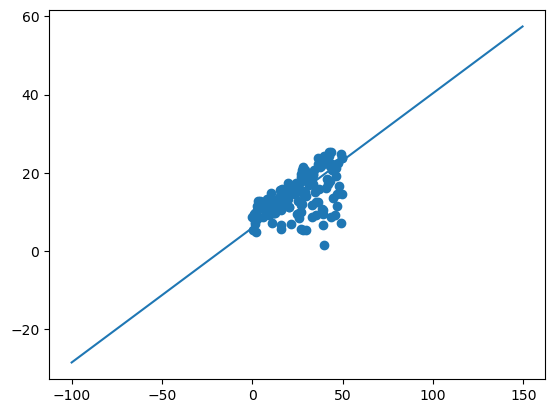

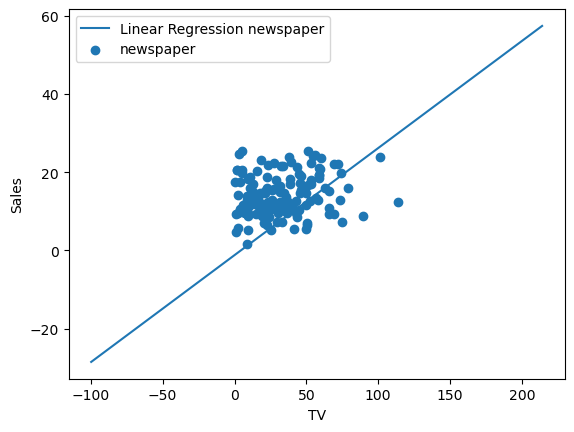

In [613]:
#plot it graphically 
x_max_1 = np.max(X_train['TV'])+100
x_min_1 = np.min(X_train['TV'])-100
x_max_2 = np.max(X_train['radio'])+100
x_min_2 = np.min(X_train['radio'])-100
x_max_3 = np.max(X_train['newspaper'])+100
x_min_3 = np.min(X_train['newspaper'])-100

#line values for x and y
x1 = np.linspace(x_min_1, x_max_1, 1000)
x2 = np.linspace(x_min_2, x_max_2, 1000)
x3 = np.linspace(x_min_3, x_max_3, 1000)

y = b + w1 * x1 + w2 * x2 + w3 * x3

#plotting line 
plt.plot(x1, y, label='Linear Regression TV')
#plot the data point
plt.scatter(X_train['TV'], y_train, label='TV')

#plotting line 
plt.figure()
plt.plot(x2, y, label='Linear Regression radio')
#plot the data point
plt.scatter(X_train['radio'], y_train, label='radio')

#plotting line 
plt.figure()
plt.plot(x3, y, label='Linear Regression newspaper')
#plot the data point
plt.scatter(X_train['newspaper'], y_train, label='newspaper')

# x-axis label
plt.xlabel('TV')
#y-axis label
plt.ylabel('Sales')
plt.legend()
plt.show()

In [614]:
preds = w1 * X_test['TV'] + w2 * X_test['radio'] + w3 * X_test['newspaper'] + b

MAE = np.sum(np.abs(preds - y_test)) / len(y_test)
MSE = np.sum((preds - y_test) ** 2) / len(y_test)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(1.5894202777105817, 3.5093660838890695, 1.8733302121860602)

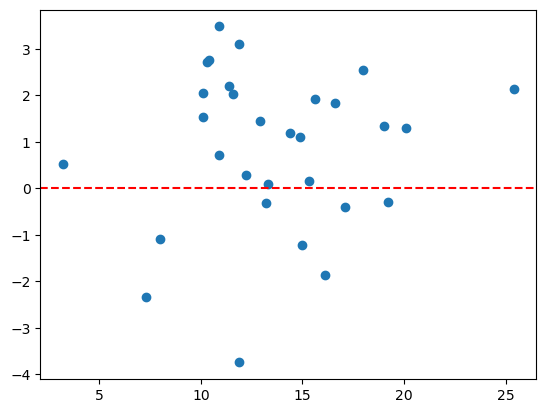

In [615]:
test_residuals = y_test - preds
plt.scatter(x=y_test, y=test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

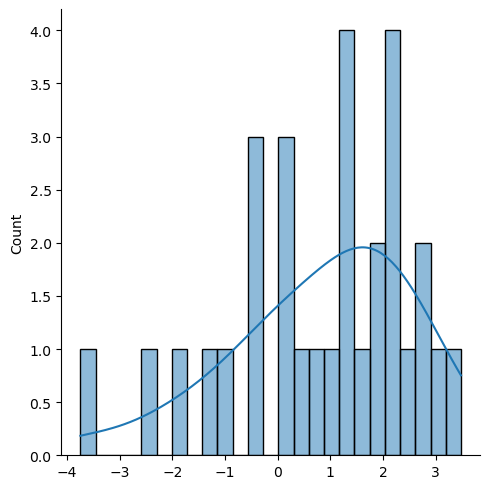

In [616]:
sns.displot(test_residuals, bins = 25, kde = True)

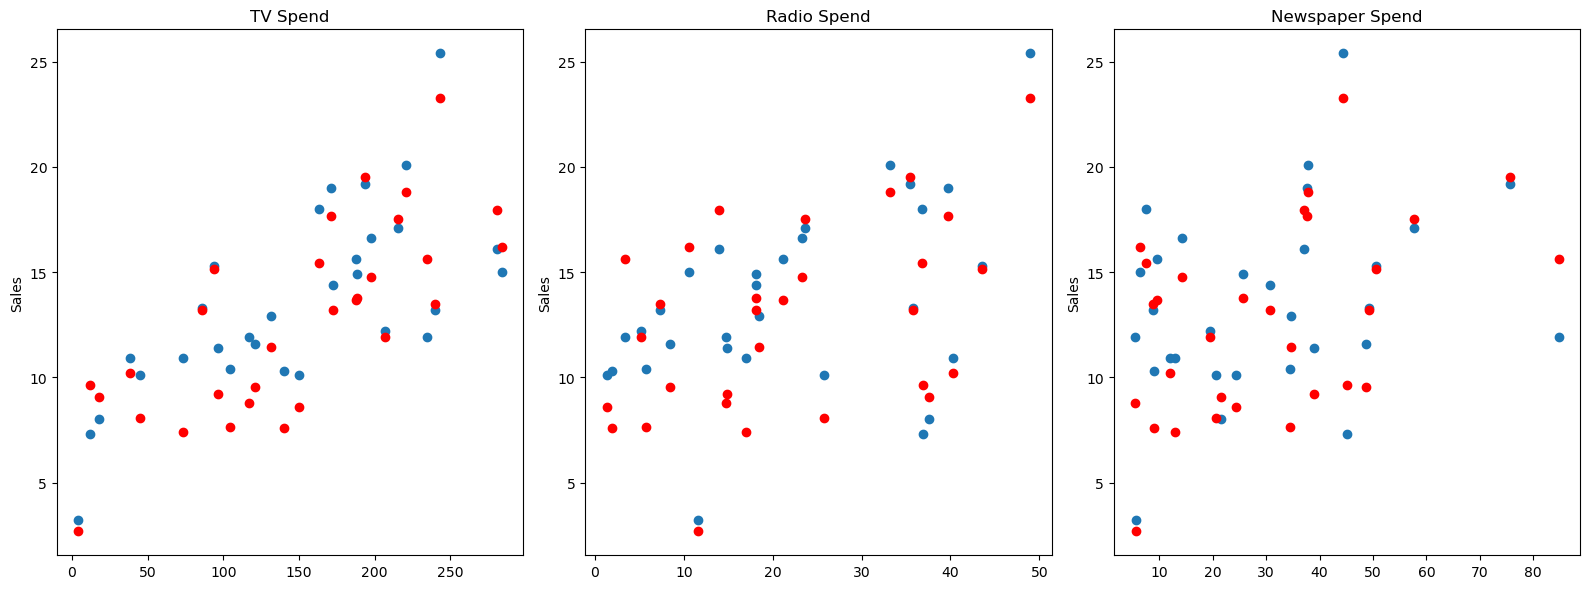

In [617]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(X_test['TV'],y_test,'o')
axes[0].plot(X_test['TV'],preds,'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(X_test['radio'],y_test,'o')
axes[1].plot(X_test['radio'],preds,'o', color = 'red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(X_test['newspaper'],y_test,'o')
axes[2].plot(X_test['newspaper'],preds,'o', color = 'red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()

# Polynomial Regression

In [618]:
def create_polynomial_features(x, degree):
    x_poly = np.ones((len(x), degree + 1))
    for i in range(1, degree + 1):
        x_poly[:, i] = x ** i
    return x_poly

In [619]:
def get_feat(x):
    feat_1 = []
    feat_2 = []
    feat_3 = []

    for i in range(1, 11): 
        feat_1.append(create_polynomial_features(x['TV'], i))
        feat_2.append(create_polynomial_features(x['radio'], i))
        feat_3.append(create_polynomial_features(x['newspaper'], i))
    return feat_1, feat_2, feat_3

feats_train = get_feat(X_train)
feats_test = get_feat(X_test)

In [620]:
def get_theta(x, y_train):
    x_transpose = np.transpose(x)  # Transpose of X
    x_transpose_dot_x = np.dot(x_transpose, x)  # X^T * X
    temp_matrix = np.linalg.inv(x_transpose_dot_x)  # (X^T * X)^-1
    theta = np.dot(np.dot(temp_matrix, x_transpose), y_train)  # Coefficients
    return theta

In [621]:
thetha = []

def get_preds(feats, y_train, calc_theta = False):
    feat_1, feat_2, feat_3 = feats
    y_pred_1 = []
    y_pred_2 = []
    y_pred_3 = []

    for i in range(10):
        if(calc_theta): 
            thetha.append((get_theta(feat_1[i], y_train), get_theta(feat_2[i], y_train), get_theta(feat_2[i], y_train)))
        y_pred_1.append(np.dot(feat_1[i], thetha[i][0]))
        y_pred_2.append(np.dot(feat_2[i], thetha[i][1]))
        y_pred_3.append(np.dot(feat_3[i], thetha[i][2]))
    return y_pred_1, y_pred_2, y_pred_3

preds_train = get_preds(feats_train, y_train, calc_theta=True)
preds_test = get_preds(feats_test, y_test)

In [622]:
def get_errors(y_pred, y_train):
    MAE = np.sum(np.abs(y_train - y_pred)) / len(y_train)
    MSE = np.sum((y_train - y_pred) ** 2) / len(y_train)
    RMSE = np.sqrt(MSE)
    return MAE, MSE, RMSE

In [623]:
def get_errors_by_features(y_preds, y_train):
    errors = []
    y_pred_1, y_pred_2, y_pred_3 = y_preds
    for i in range(10):
        errors.append((get_errors(y_pred_1[i], y_train), get_errors(y_pred_2[i], y_train), get_errors(y_pred_3[i], y_train)))
    return errors

errors_train = get_errors_by_features(preds_train, y_train)
errors_test = get_errors_by_features(preds_test, y_test)

In [624]:
pd.DataFrame(errors_train, columns = ['TV', 'radio', 'newspaper'])

TV  \
0  (2.4205733523845367, 9.711745146978942, 3.1163...   
1  (2.4206371045000843, 9.34952475294209, 3.05769...   
2  (2.401764609695062, 9.303066389597111, 3.05009...   
3  (2.396492127585275, 9.297651413873908, 3.04920...   
4  (2.3582679134270474, 9.115181093993694, 3.0191...   
5  (2.350843360427, 9.076698652696262, 3.01275598...   
6  (2.349860359116615, 9.060222327951214, 3.01002...   
7  (2.3401223691177035, 9.04332319875268, 3.00721...   
8  (2.338158986360491, 9.03981107188251, 3.006627...   
9  (2.3329933514297303, 9.032055386851324, 3.0053...   

                                               radio  \
0  (3.4735156449907136, 19.414113885707675, 4.406...   
1  (3.4713728580846466, 19.398204789860785, 4.404...   
2  (3.471446202403607, 19.398110901839612, 4.4043...   
3  (3.466847235168301, 19.358920164746458, 4.3998...   
4  (3.4709775960828493, 19.29294594531467, 4.3923...   
5  (3.458004489264814, 19.25750638141738, 4.38833...   
6  (3.412230520578837, 19.133039767675747, 4.3741...   
7  (3.4146590271735, 19.06335764174445, 4.3661605...   
8  (3.412631714229171, 18.97114873611246, 4.35558...   
9  (3.2850162740639632, 18.24496300323626, 4.2714...   

                                           newspaper  
0  (4.958656632980519, 40.802451261991756, 6.3876...  
1  (4.78032432252686, 37.17177637686063, 6.096866...  
2  (4.727012165764325, 36.08245791230548, 6.00686...  
3  (9.965508955217034, 1372.193320851306, 37.0431...  
4  (46.215417449398494, 82842.01162818012, 287.82...  
5  (173.57408175825336, 1754121.5275011545, 1324....  
6  (2309.5830482404904, 373019556.8021978, 19313....  
7  (14455.82823528738, 16254846520.308147, 127494...  
8  (107098.527341543, 992668043151.2041, 996327.2...  
9  (1901905.3526954115, 342118268785352.3, 184964...

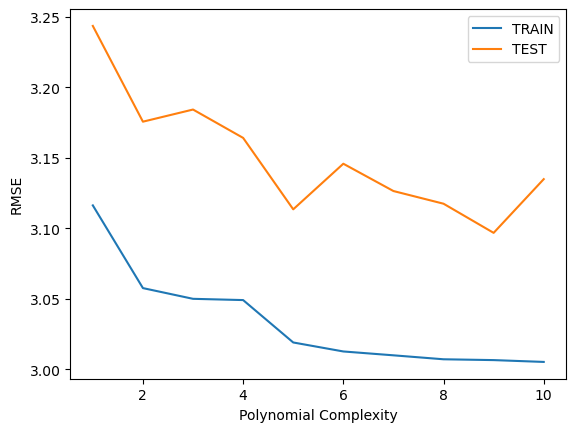

In [625]:
plt.plot(range(1,11), list(map(lambda err: err[0][2], errors_train)), label='TRAIN')
plt.plot(range(1,11), list(map(lambda err: err[0][2], errors_test)), label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

# Ridge Regression

In [626]:
iterations = 100
learning_rate = 0.01
l2_penality = 1000

def predict(X, y, W = np.zeros(n), b = 0):
    m, n = X.shape
    W = W
    b = b
    y_pred = 0
    
    err = []
    
    for i in range(iterations):             
        y_pred = X.dot(W) + b
        
        dW = ( - ( 2 * ( X.T ).dot( y - y_pred ) ) + ( 2 * l2_penality * W ) ) / m      
        db = - 2 * np.sum( y - y_pred ) / m  
          
        # update weights     
        W = W - learning_rate * dW     
        b = b - learning_rate * db  
        
        err.append(np.sum(np.abs(y - y_pred)) / len(y))
        
    return err

y_pred = predict(X_train, y_train, np.array([0.04888180899352708, 0.19476089939873376, 0.04165802530822668]), -0.015034563587117059)
index = y_pred.index(np.sort(y_pred)[0])
index, y_pred[index]

(0, 1.8283932126365867)

In [627]:
y_pred = y_train -5

In [628]:
( - ( 2 * ( X_train.T ).dot( y_train - y_pred ) ) + ( 2 * 1 * np.array([1,1,1]) ) ) / 3  

TV          -67094.333333
radio       -11519.666667
newspaper   -15128.666667
dtype: float64

In [629]:
class RidgeRegScratch():
  # include solver parameter for flexible implementation of gradient descent
  # solution in future, alpha is used in place of lambda to mimic scikit-learn
  def __init__(self, alpha=1.0, solver='closed'):
      self.alpha = alpha
      self.solver = solver

  def fit(self, X, y):
      X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
      self.X_intercept = X_with_intercept
      if self.solver == 'closed':
          # number of columns in matrix of X including intercept
          dimension = X_with_intercept.shape[1]
          # Identity matrix of dimension compatible with our X_intercept Matrix
          A = np.identity(dimension)
          # set first 1 on the diagonal to zero so as not to include a bias term for
          # the intercept
          A[0, 0] = 0
          # We create a bias term corresponding to alpha for each column of X not
          # including the intercept
          A_biased = self.alpha * A
          thetas = np.linalg.inv(X_with_intercept.T.dot(
              X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)
      self.thetas = thetas
      return self

  def predict(self, X):
      thetas = self.thetas
      X_predictor = np.c_[np.ones((X.shape[0], 1)), X]
      self.predictions = X_predictor.dot(thetas)
      return self.predictions

In [630]:
model = RidgeRegScratch(alpha=10000000)

In [631]:
model.fit(X_train, y_train)

In [632]:
preds = model.predict(X_test)
preds

array([13.81210111, 14.3976133 , 14.50939431, 13.95618169, 13.92388394,
       14.11179357, 14.57662274, 14.62542914, 13.6614836 , 13.68662784,
       14.77652733, 14.03778453, 14.3908191 , 14.28543785, 14.34283453,
       13.48622171, 13.93321084, 14.15985086, 13.54749884, 14.0889816 ,
       14.27646403, 13.89046592, 14.3485543 , 14.23886371, 14.01126228,
       14.57056882, 13.56973432, 14.42443219, 14.48596814, 14.78238461])

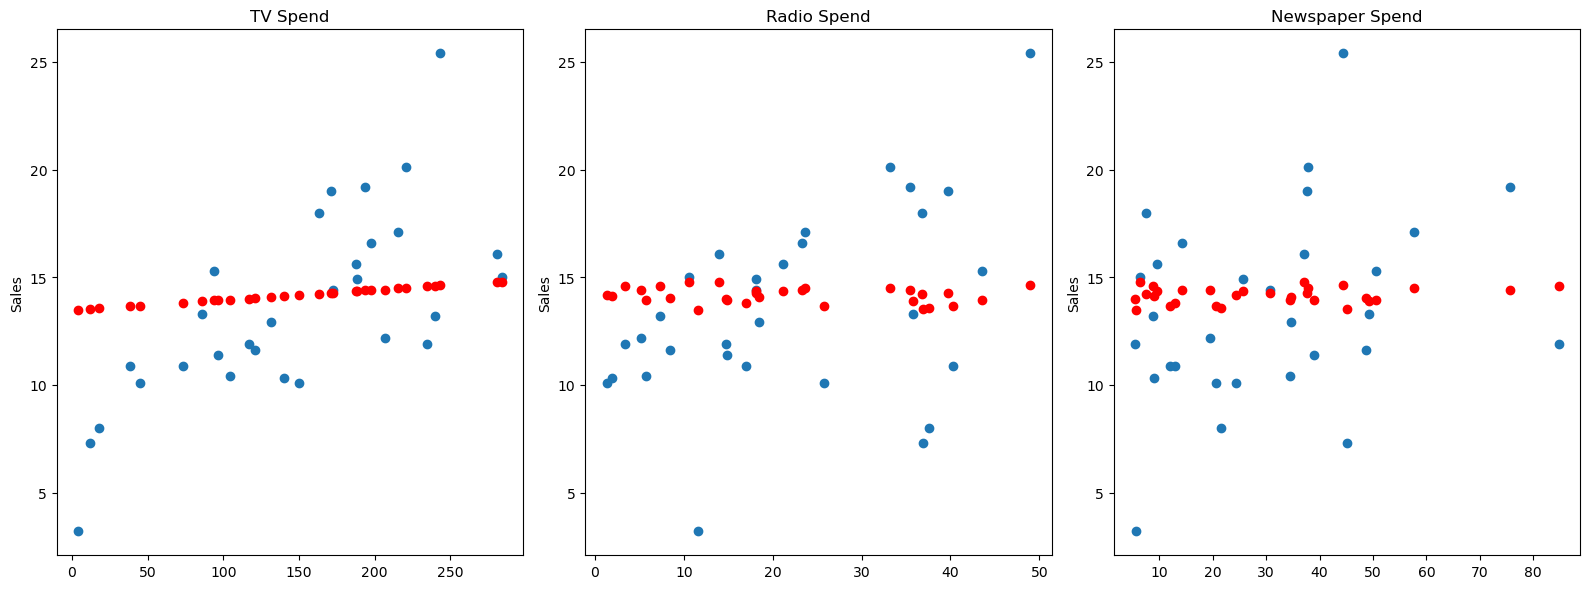

In [633]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(X_test['TV'],y_test,'o')
axes[0].plot(X_test['TV'],preds,'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(X_test['radio'],y_test,'o')
axes[1].plot(X_test['radio'],preds,'o', color = 'red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(X_test['newspaper'],y_test,'o')
axes[2].plot(X_test['newspaper'],preds,'o', color = 'red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()

# Lasso / Ridge Regression

In [634]:
def fit(X, y, iterations, lamda, learning_rate, regularization_func='l1'):
    X = np.insert(X, 0, 1, axis=1)
    m, n = X.shape
    w = np.zeros((n , 1))
    b = 0
    costs = []
    regularization = 0
    derivation = 0
    
    for i in range(iterations + 1):
        y_pred = np.dot(X, w) + b
        if regularization_func == 'l1':
            # Lasso Regression L1
            regularization = lamda * np.sum(np.abs(w))
            derivation = lamda * np.sign(w) 
        else:
            #Ridge Regression L2
            regularization = lamda * np.sum(np.square(w))
            derivation = lamda * 2 * w
        
        cost = (1 / (2*m)) * np.sum(np.square(y_pred - y)) + regularization
        costs.append(cost)
        dw = (1/m) * np.dot(X.T, (y_pred - y)) + derivation
        db = -(2 / m) * np.sum((y_pred - y))
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
#     print('costs: ', costs)
    plt.plot(costs, label='TRAIN')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
        
    def predict(X):
#         print('W=', w)
#         print('b=', b)
        X = np.insert(X, 0, 1, axis=1)
        return np.dot(X, w) + b
        
    return predict

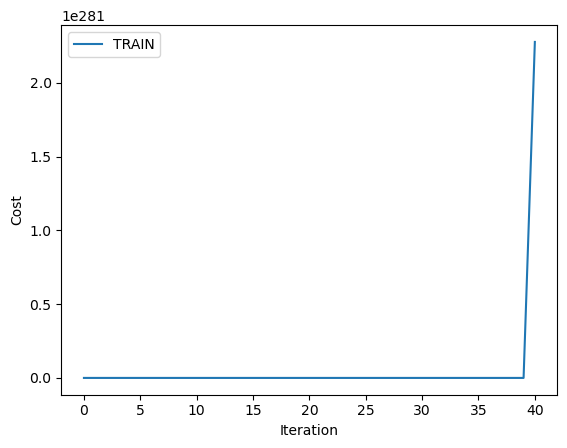

In [635]:
param = {
    "lamda" : 0.1,
    "learning_rate" : 0.1,
    "iterations" : 40,
    "regularization_func": "l2"
}

model_predict = fit(X_train, np.array(y_train), **param)
preds = model_predict(X_test)

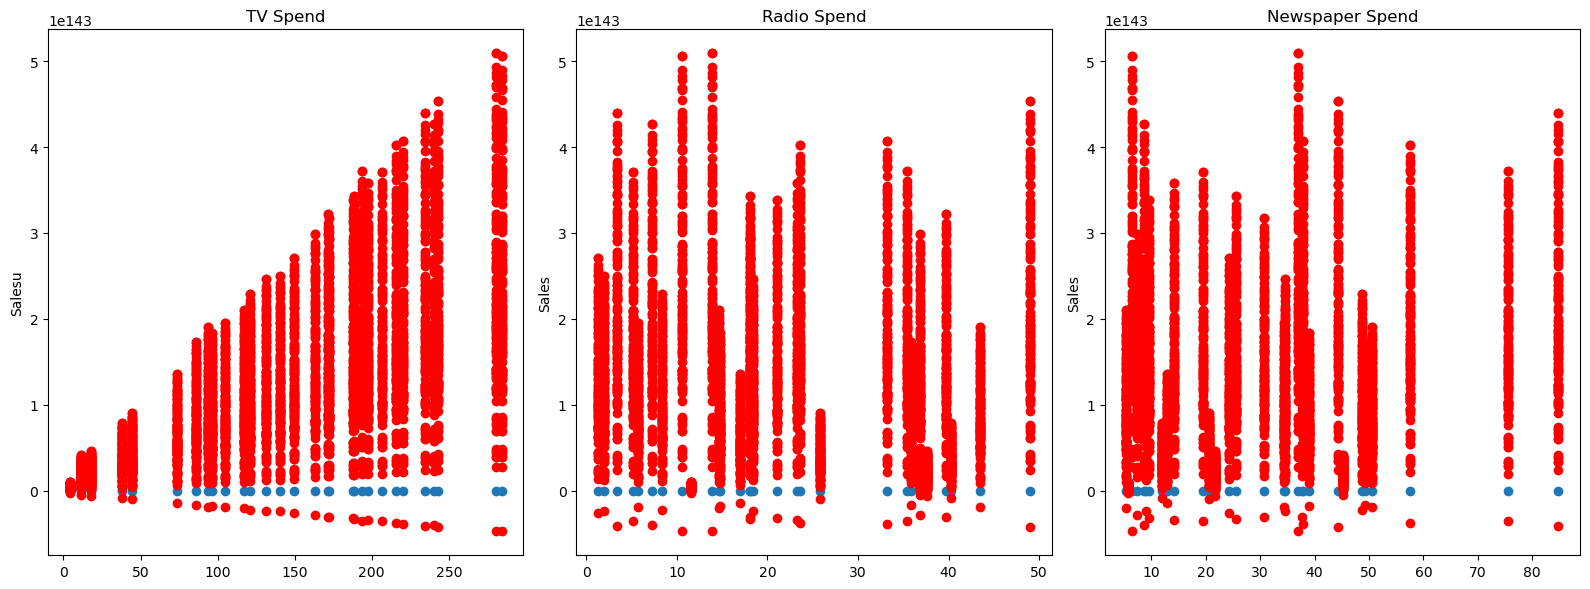

In [636]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(X_test['TV'],y_test,'o')
axes[0].plot(X_test['TV'],preds,'o', color = 'red')
axes[0].set_ylabel("Salesu")
axes[0].set_title("TV Spend")

axes[1].plot(X_test['radio'],y_test,'o')
axes[1].plot(X_test['radio'],preds,'o', color = 'red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(X_test['newspaper'],y_test,'o')
axes[2].plot(X_test['newspaper'],preds,'o', color = 'red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()

## prepare dataset

In [637]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import plotly.express as px

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X, y = dataset.data, dataset.target 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

dataset = datasets.load_breast_cancer(as_frame=True)
dataset.data

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [638]:
unique, counts = np.unique(dataset['target'], return_counts=True)
 
fig = px.pie(values=counts, names=unique)
fig.show()

<Axes: xlabel='target', ylabel='count'>

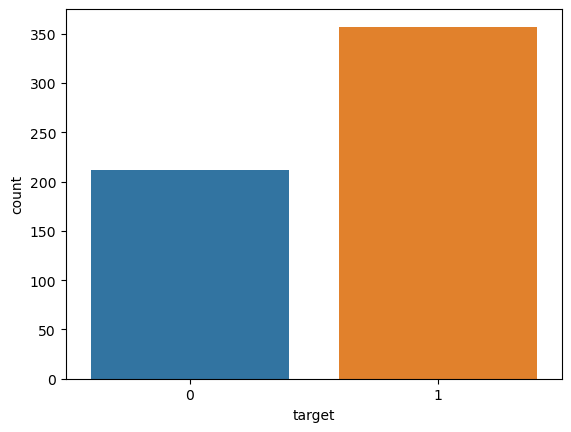

In [639]:
sns.countplot(data=dataset, x='target')

In [640]:
dataset.data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [641]:
dataset.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [642]:
dataset_full = dataset.data.copy()
dataset_full['target'] = dataset.target

for column in  dataset_full.columns:
    fig = px.box(data_frame=dataset_full, x='target',color='target',y=column, color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show()        

In [643]:
for column in  dataset_full.columns:
    fig = px.scatter(data_frame=dataset_full, color='target',x=column, color_discrete_sequence=['#007500','#5CFF5C'])
    fig.show()     

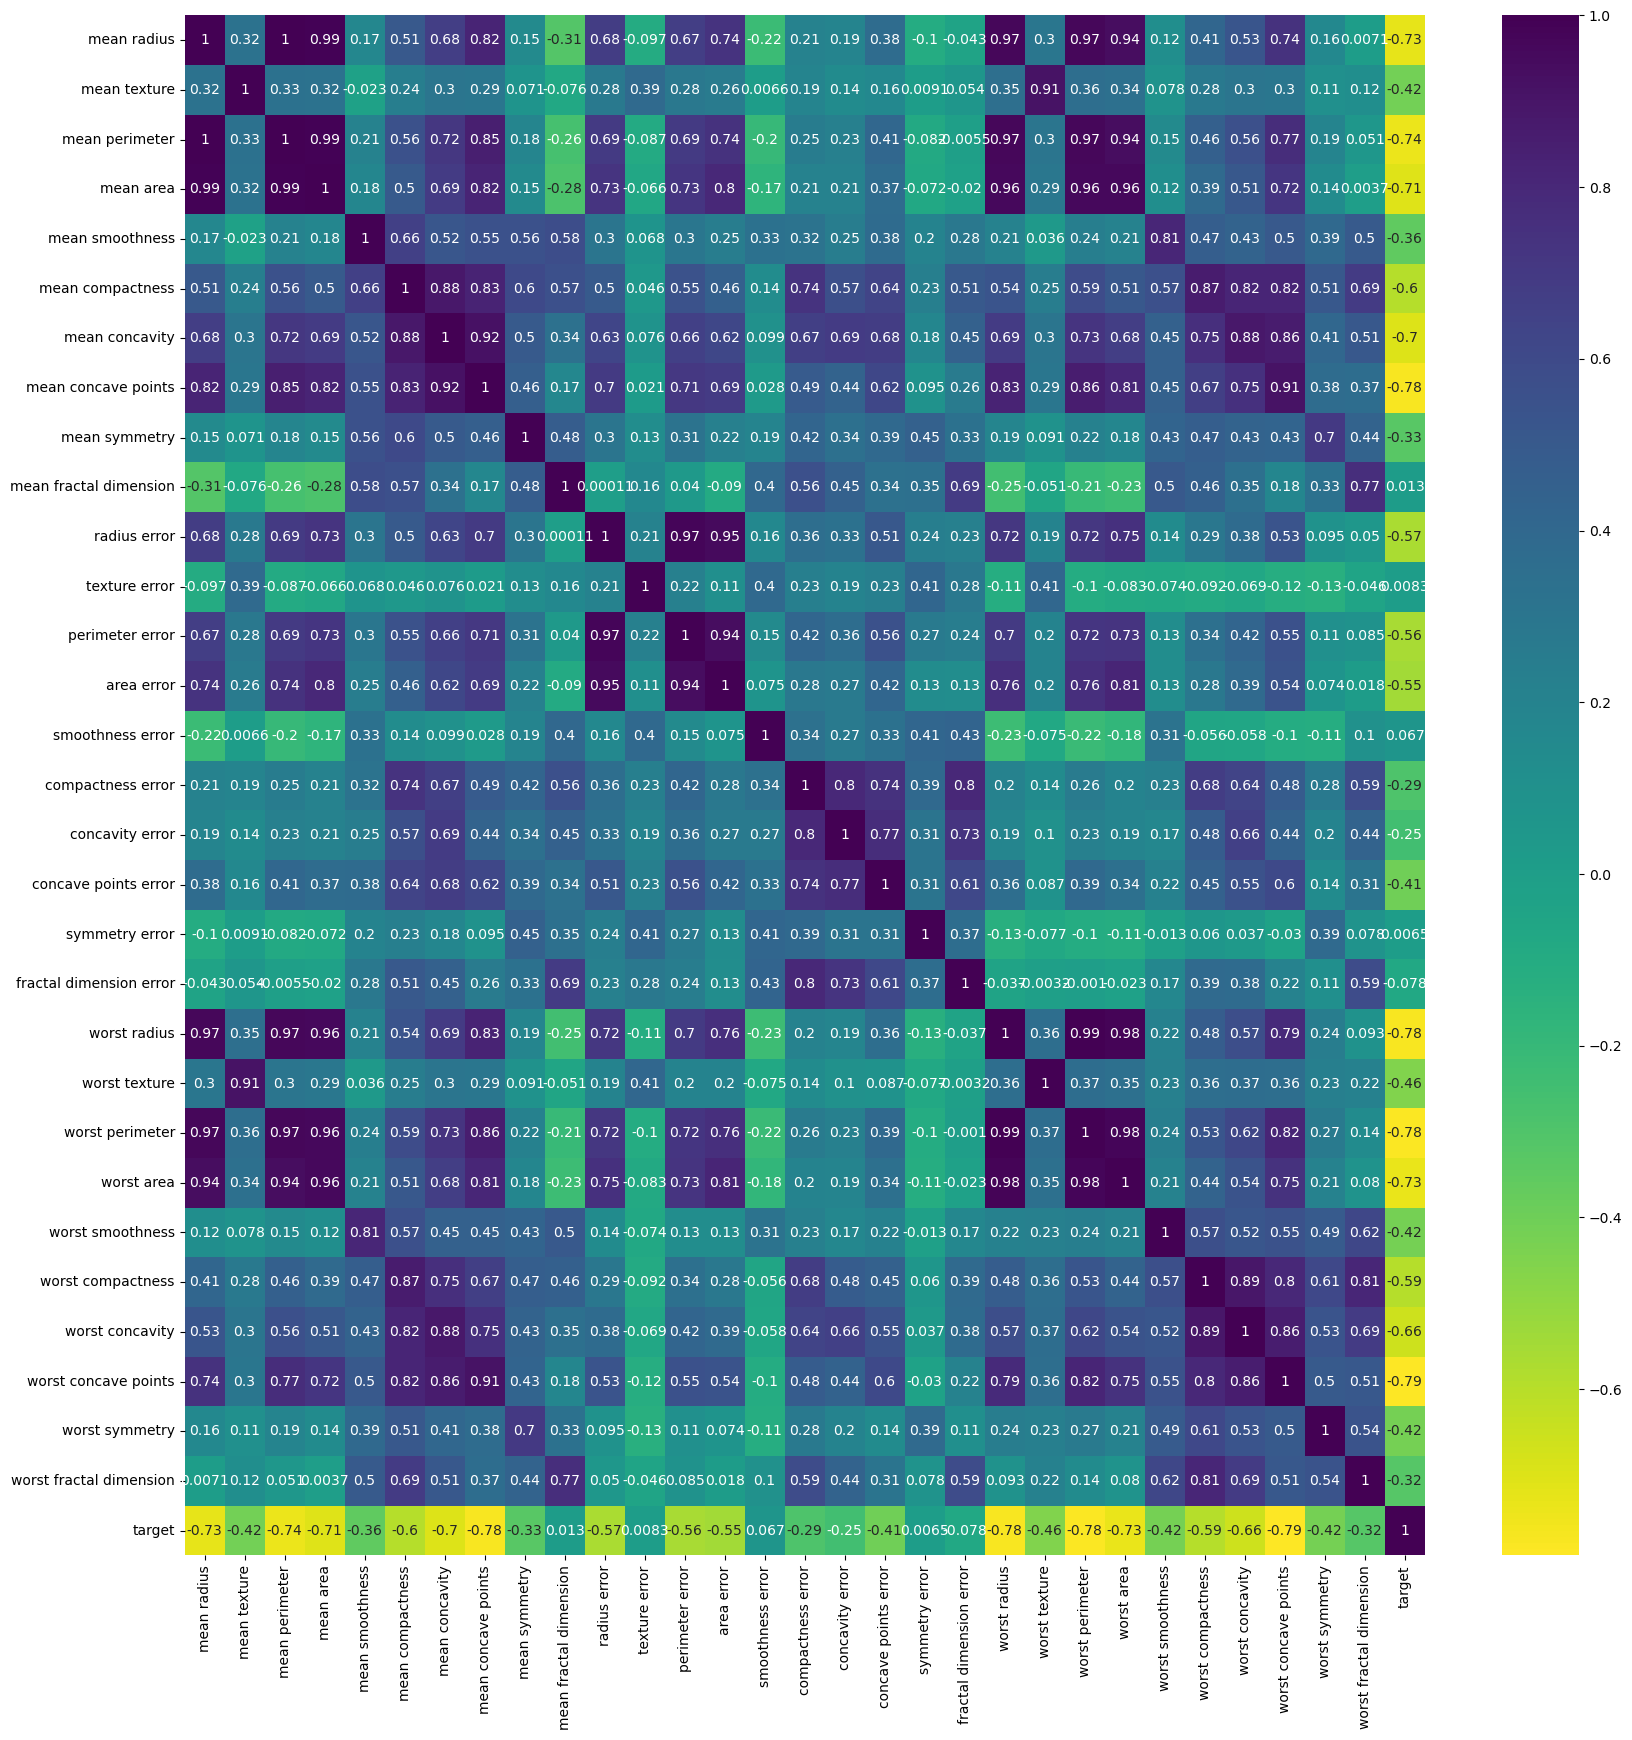

In [644]:
corr = dataset_full.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

In [645]:
cor_target = abs(corr["target"])
relevant_features = cor_target[cor_target > 0.25]
names = [index for index, value in relevant_features.items()]
names.remove('target')
names

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'radius error',
 'perimeter error',
 'area error',
 'compactness error',
 'concavity error',
 'concave points error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [646]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std

    return X

In [647]:
X = scale(X)

In [648]:
X = dataset_full[names].values
y = dataset_full['target'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

# Logistic Regression

In [649]:
def compute_loss(y_true, y_pred):
    # binary cross entropy
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)
    
def fit(X, y, iterations, learning_rate):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0
    losses = []
    for i in range(iterations):
        y_pred = -(np.dot(X, w) + b)
        A = 1 / (1 + np.exp(y_pred)) # sigmoid
        dw = 1 / m * np.dot(X.T, A - y)
        db = 1 / m * np.sum(A - y)
        losses.append(compute_loss(y, A))
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    def predict(X):
        y_pred = -(np.dot(X, w) + b)
        A = 1 / (1 + np.exp(y_pred)) # sigmoid
        return [1 if item > 0.5 else 0 for item in A]
    return predict

In [650]:
param = {
    "learning_rate" : 0.0001,
    "iterations" : 1000,
}

model_predict = fit(X_train, y_train, **param)
y_pred = model_predict(X_test)

In [651]:
# 0,0 0,1
# FP  TP
# 1,0 1,1
# TN  FN
def confusion_matrix(y_true, y_pred):
    result = [[0, 0], [0, 0]]
    for i in range(len(y_true)):
        if(y_true[i] == 1):
            if(y_true[i] == y_pred[i]):
                result[0][1] += 1
            else: 
                result[0][0] += 1
        else: # y_true[i] == 0
            if(y_true[i] == y_pred[i]):
                result[1][0] += 1
            else: 
                result[1][1] += 1
    return result

np.array(confusion_matrix(y_test, y_pred))

array([[ 2, 67],
       [39,  6]])

# Desicion Tree

In [652]:
arr = np.array([
    [1,3],
    [4,6],
    [7,9],
    [1,5],
    [1,7],
    [6,12],
    [1,10],
    [8,1],
])

X_train = arr[:, 0:1]
y_train = arr[:, 1:]

In [653]:
class Node(): 
    def __init__(self, left=None, right=None, gain=None, threshold=None, feature=None, value=None):
        self.left = left
        self.right = right
        self.gain = gain
        self.threshold = threshold
        self.feature = feature
        self.value = value


def entropy(data): 
    res = 0
    unique_data = np.unique(data)
    for val in unique_data:
        freq = len(data[data == val]) / len(data)
        res += -freq * np.log2(freq)
    return res

def split(dataset, num_feature):
    perfect_split = {'threshold': None, 'gain': -1}
    
    for feature_index in range(num_feature):
        for val_to_check in dataset[:, feature_index]:
            left = []
            right = []
            for row in  dataset:
                if(row[feature_index] <= val_to_check):
                    left.append(row)
                else:
                    right.append(row)
            left = np.array(left)
            right = np.array(right)
            
            if len(left) and len(right):
                # Y
                y_dataset = dataset[:, -1]
                y_left = left[:, -1]
                y_right = right[:, -1]

                main_entropy = entropy(y_dataset)
                left_entropy = entropy(y_left)
                right_entropy = entropy(y_right)

                weighted_entropy = len(y_left)/len(y_dataset) * left_entropy + len(y_right)/len(y_dataset) * right_entropy
                information_gain = main_entropy - weighted_entropy
                if information_gain > perfect_split['gain']:
                    perfect_split['gain'] = information_gain
                    perfect_split['threshold'] = val_to_check
                    perfect_split['left'] = left
                    perfect_split['right'] = right
                    perfect_split['feature'] = feature_index
    return perfect_split

def build_tree(dataset, depth = 0):
    num_samples, num_feature = dataset.shape
    best_split = split(dataset, num_feature)
    
    if type(best_split.get('left')) != type(None) and type(best_split.get('right')) != type(None):
        left_node = build_tree(best_split['left'], depth + 1)
        right_node = build_tree(best_split['right'], depth + 1)
        return Node(left_node, right_node, best_split['gain'], best_split['threshold'], best_split['feature'])
    #leaf
    y = list(dataset[:, -1])
    freq_val = max(y, key=y.count)
    return Node(value=freq_val)

def fit(dataset):
    root = build_tree(dataset)
    return root

def magic_of_prediction(value, node):
    if node.value != None:
        return node.value
    if value[node.feature] <= node.threshold:
        return magic_of_prediction(value, node.left)
    return magic_of_prediction(value, node.right)

def predict(X, root):
    return [magic_of_prediction(x, root) for x in X]

In [654]:
arr = np.array([
    [1,3],
    [4,6],
    [7,9],
    [1,5],
    [1,7],
    [6,12],
    [1,10],
    [8,1],
])

predict(np.array([[5],[7],[9]]), fit(arr))

[12, 9, 1]

# SVM

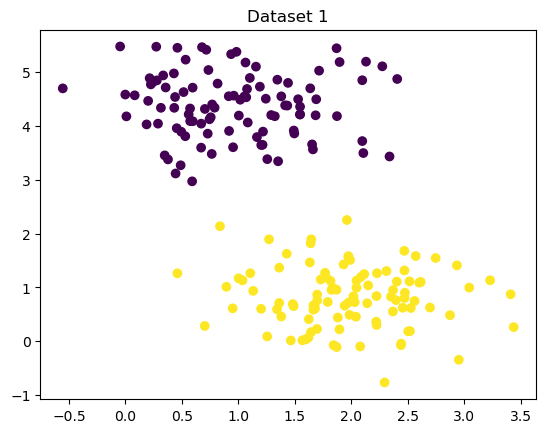

In [655]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title("Dataset 1")
plt.show()

In [656]:
def fit(X, y, iterations = 1000, learning_rate=0.001, lamdba_ = 0.01):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    
    for iteration in range(iterations):
        for i, Xi in enumerate(X):
            if y[i] * (np.dot(Xi, w) - b) >= 1:
                w -= learning_rate * (2 * lamdba_ * w)
            else:
                w -= learning_rate * (2 * lamdba_ * w - np.dot(Xi, y[i]))
                b -= learning_rate * y[i]
    return w, b

def predict(X, w, b):
    res = np.dot(X, w) - b
    return [1 if item > 0 else -1 for item in res]

In [657]:
w,b = fit(X1, y1)
res = predict(X1, w,b)
accuracy_score(res, y1)

1.0

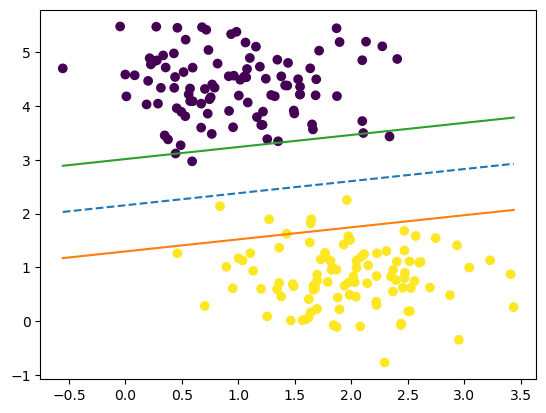

In [658]:
def func(X, w, b, offset):
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    res = (-w[0] * np.array([x_min, x_max]) + b + offset) / w[1]
    
    return [x_min, x_max], res

# all data
plt.scatter(X1[:, 0], X1[:, 1], c=y1)

# middle line
p1 = func(X1, w, b, 0)
plt.plot(p1[0], p1[1], '--')

# top line
p2 = func(X1, w, b, 1)
plt.plot(p2[0], p2[1], '-')

# bottom line
p3 = func(X1, w, b, -1)
plt.plot(p3[0], p3[1], '-')


# KNN


In [659]:
dataset = [
    [2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]
          ]
test = [8.675418651, 2.088626775,1]

In [660]:
from functools import reduce

def get_distance(point_1, point_2):
    res = 0
    for i in range(len(point_2)):
        res += (point_1[i] - point_2[i])**2
    return np.sqrt(res)

def predict(data, row_to_predict, n_neighbors):
    distances = []
    for row in data:
        distances.append([get_distance(row, row_to_predict), row[-1]])
    distances.sort(key = lambda item: item[0])
    
    def count_freq(accum, item): 
        accum[f'{item[1]}'] += 1
        return accum
    result = reduce(count_freq, distances[:n_neighbors], {'0': 0, '1': 0})

    return 0 if result['0'] > result['1'] else 1

predict(dataset, test, 5)

1

# Naive Bayes

In [661]:
from sklearn.model_selection import train_test_split

def fit(X, y):
    dataset = X.copy()
    dataset['target'] = y
    
    features = X.columns
    targets = dataset['target'].unique()
    n_unique_labels = len(targets)

    mean = dataset.groupby(by='target').apply(lambda x: x.mean(axis=0)).values
    variance = dataset.groupby(by='target').apply(lambda x: x.var(axis=0)).values
    
    prior = np.log(dataset.groupby(by = 'target').apply(lambda item: len(item) / len(df))).values

    return {
      'features': features,
      'targets': targets,
      'means': mean,
      'variances': variance,
      'prior': prior
    }

def predict(X, setup):
    prior, targets, features, means, variances = setup['prior'], setup['targets'], setup['features'], setup['means'], setup['variances']
    predictions = []
    for row_ind in range(len(X)):
        posterior_probabilities = []
        df_row = X.iloc[row_ind]

        for target_ind in range(len(targets)):
            posterior = 0
            for feature_ind in range(len(features)):
                variance = variances[target_ind][feature_ind]
                mean = means[target_ind][feature_ind]
                posterior += np.log((1 / np.sqrt(2*np.pi*variance) ) * np.exp( (-(df_row[feature_ind] - mean)**2)  / ( 2*variance ) ))
            posterior_probabilities.append(posterior)
            
        probabilities = prior + posterior_probabilities
        mx_idx = np.argmax(probabilities)
        predictions.append(targets[mx_idx])  
    return predictions

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

setup = fit(X_train, y_train)
preds = predict(X_test, setup)
accuracy = len(test_df.loc[preds == test_df['target']])/len(test_df) * 100
accuracy

43.333333333333336

In [662]:
x = X.iloc[:, 0]
mean = np.sum(x) / len(x)
variance = np.sum((x - mean)**2) / (len(x))